# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sahra Zulqaidah
- **Email:** sahrazulqaidah@gmail.com
- **ID Dicoding:** sahra_zulqaidah

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :
Bagaimana tren jumlah penyewaan sepeda dari tahun 2011 hingga 2012?
- Pertanyaan 2 :
Pada hari apa dalam seminggu jumlah penyewaan sepeda tertinggi dan terendah terjadi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Day Dataset

In [ ]:
day_df = pd.read_csv("/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Hour Dataset

In [ ]:
hour_df = pd.read_csv("/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Kita telah membaca dua dataset:
- **`day.csv`**: Data penyewaan sepeda per hari.
- **`hour.csv`**: Data penyewaan sepeda per jam.

### Assessing Data
#### Menampilkan informasi dataset
- Day dataset

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


- Hour dataset

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dataset `day_df` memiliki **731 baris** dan **16 kolom**, sedangkan `hour_df` memiliki **17.379 baris** dan **17 kolom**.  
- Tidak ada **missing values** maupun **duplikasi**, tetapi kolom **`dteday`** masih dalam format `object`, sehingga perlu dikonversi ke `datetime` untuk analisis berbasis waktu.


### Cleaning Data

Mengubah tipe data kolom **dteday** pada kedua *dataframe* menjadi **datetime**

In [ ]:
# Daftar kolom yang akan dikonversi ke datetime
datetime_columns = ["dteday"]

# Konversi ke tipe datetime
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

Menampilkan Hasil
- Day dataset

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Hour Dataset

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom `dteday` telah berhasil dikonversi ke format datetime agar dapat digunakan dalam analisis berbasis waktu dengan lebih efektif.
- Proses pembersihan data ini memastikan bahwa tidak ada format data yang menghambat analisis, terutama dalam manipulasi tanggal dan waktu.

### Mengatur Label

In [ ]:
# Mengatur label tahun
year_labels = {0: '2011', 1: '2012'}
day_df['yr'] = day_df['yr'].map(year_labels)

In [ ]:
# Mengatur label hari dalam seminggu
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

In [ ]:
# Mengatur kategori waktu
def time_of_day(hour):
    if 6 <= hour < 12:
        return "Pagi"
    elif 12 <= hour < 16:
        return "Siang"
    elif 16 <= hour < 20:
        return "Sore"
    else:
        return "Malam"

# Menambahkan kolom baru untuk kategori waktu dalam sehari
hour_df['time_of_day'] = hour_df['hr'].apply(time_of_day)

## Exploratory Data Analysis (EDA)

## EDA dengan menghitung rata-rata jumlah penyewaan sepeda berdasarkan tahun

In [ ]:
# Menghitung rata-rata penyewaan sepeda berdasarkan tahun
year = day_df.groupby('yr')['cnt'].mean()

# Menampilkan hasilnya
year

,cnt
yr,
2011,3405.761644
2012,5599.934426


**Insight**

- 2011: Rata-rata penyewaan sepeda = 3,405.76
- 2012: Rata-rata penyewaan sepeda = 5,599.93

Terjadi peningkatan signifikan dalam jumlah rata-rata penyewaan sepeda dari tahun 2011 ke 2012, dengan selisih sekitar +2,194 sepeda per hari atau meningkat sekitar 64.5%.

## EDA dengan menghitung total penyewaan sepeda berdasarkan hari dalam seminggu.

In [ ]:
# Menghitung total penyewaan sepeda berdasarkan hari dalam seminggu
weekday_rentals = day_df.groupby("weekday")["cnt"].sum().sort_values(ascending=False)

# Menampilkan hasil
print("\nTotal Penyewaan Sepeda per Hari dalam Seminggu:")
print(weekday_rentals)


Total Penyewaan Sepeda per Hari dalam Seminggu:
weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64


**Insight**
- Penyewaan tertinggi pada Jumat (487,790), menunjukkan sepeda banyak digunakan untuk transportasi kerja atau sekolah sebelum akhir pekan.
- Penyewaan terendah pada Minggu (444,027), kemungkinan karena lebih banyak orang beristirahat atau menggunakan transportasi lain.
- Hari kerja cenderung lebih tinggi daripada akhir pekan, menandakan sepeda lebih sering digunakan untuk aktivitas rutin dibanding rekreasi.

## EDA dengan menghitung rata-rata penyewaan sepeda antara pagi, siang, sore, dan malam pada hari kerja dan akhir pekan

In [ ]:
# Filter hari kerja dan akhir pekan
hour_df_workday = hour_df[hour_df["workingday"] == 1]
hour_df_weekend = hour_df[hour_df["workingday"] == 0]

In [ ]:
# Menghitung rata-rata penyewaan per jam untuk hari kerja
workday_hourly_avg = hour_df_workday.groupby("hr")["cnt"].mean()
print("\nRata-rata penyewaan sepeda per jam pada hari kerja:")
print(workday_hourly_avg)


Rata-rata penyewaan sepeda per jam pada hari kerja:
hr
0      36.786290
1      16.552632
2       8.683778
3       4.942553
4       5.429787
5      24.913131
6     102.500000
7     290.612903
8     477.006048
9     241.518145
10    135.366935
11    158.229839
12    200.820926
13    198.429719
14    183.572289
15    201.331325
16    293.122244
17    525.290581
18    492.226908
19    348.401606
20    249.718876
21    186.287149
22    138.389558
23     88.708835
Name: cnt, dtype: float64


In [ ]:
# Menghitung rata-rata penyewaan per jam untuk akhir pekan
weekend_hourly_avg = hour_df_weekend.groupby("hr")["cnt"].mean()
print("\nRata-rata penyewaan sepeda per jam pada akhir pekan:")
print(weekend_hourly_avg)


Rata-rata penyewaan sepeda per jam pada akhir pekan:
hr
0      90.800000
1      69.508696
2      53.171053
3      25.775330
4       8.264317
5       8.689189
6      18.742358
7      43.406926
8     105.653680
9     171.623377
10    255.909091
11    315.316017
12    366.259740
13    372.731602
14    364.645022
15    358.813853
16    352.727273
17    323.549784
18    281.056522
19    231.673913
20    174.739130
21    142.060870
22    116.060870
23     85.930435
Name: cnt, dtype: float64


**insight**

- Hari kerja vs. akhir pekan: Pada hari kerja, puncak penyewaan terjadi dua kali, yaitu pagi (07:00 - 09:00) saat orang berangkat kerja dan sore (17:00 - 19:00) saat pulang kerja. Sebaliknya, pada akhir pekan, penyewaan lebih merata sepanjang hari dengan puncak di siang hingga sore (10:00 - 16:00).

- Dini hari (00:00 - 03:00): Jumlah penyewaan di akhir pekan lebih tinggi dibandingkan hari kerja, tetapi tetap rendah dibandingkan jam-jam lainnya. Ini menunjukkan lebih banyak aktivitas malam di akhir pekan, meskipun bukan jam tersibuk.

- Malam hari (20:00 - 23:00): Penyewaan di akhir pekan tetap lebih tinggi dibandingkan hari kerja, tetapi jumlahnya tidak melebihi penyewaan di siang atau sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda dari tahun 2011 hingga 2012?

<ipython-input-107-cca059095bf9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_rentals, x='yr', y='cnt', palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

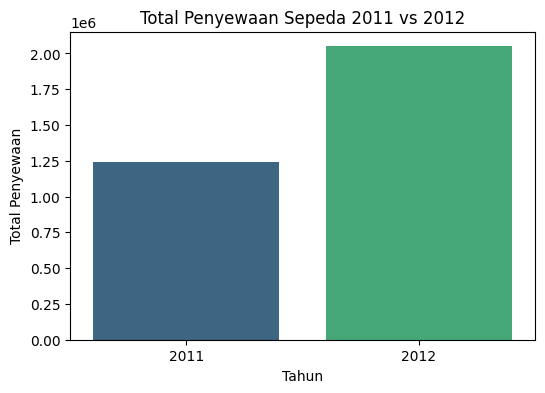

In [ ]:
# Menghitung total penyewaan sepeda per tahun
yearly_rentals = day_df.groupby('yr')['cnt'].sum().reset_index()

# Visualisasi tren penyewaan sepeda per tahun
plt.figure(figsize=(6, 4))
sns.barplot(data=yearly_rentals, x='yr', y='cnt', palette='viridis')

# Label dan judul
plt.title("Total Penyewaan Sepeda 2011 vs 2012")
plt.xlabel("Tahun")
plt.ylabel("Total Penyewaan")
plt.show

Grafik menunjukkan tren penyewaan sepeda dari tahun 2011 hingga 2012 mengalami peningkatan yang signifikan. Pada awal tahun 2011, jumlah penyewaan masih relatif rendah, namun mulai meningkat tajam pada tahun 2012.

### Pertanyaan 2: Pada hari apa dalam seminggu jumlah penyewaan sepeda tertinggi dan terendah terjadi?

<ipython-input-108-7b6f634c2262>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_rentals = day_df.groupby('weekday')['cnt'].sum().reset_index()
<ipython-input-108-7b6f634c2262>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_rentals, x='weekday', y='cnt', palette='crest')


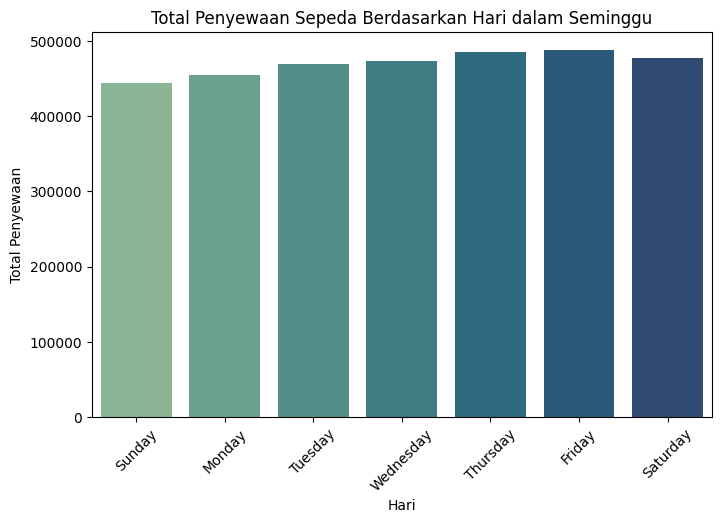

In [ ]:
# Menghitung total penyewaan berdasarkan hari dalam seminggu
day_df['weekday'] = pd.Categorical(day_df['weekday'], categories=weekday_order, ordered=True)
weekday_rentals = day_df.groupby('weekday')['cnt'].sum().reset_index()

# Membuat bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_rentals, x='weekday', y='cnt', palette='crest')
plt.title("Total Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Total Penyewaan")
plt.xticks(rotation=45)
plt.show()

Hasil analisis menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada hari Jumat, diikuti oleh Kamis. Sementara itu, jumlah penyewaan terendah terjadi pada hari Minggu, dengan sedikit peningkatan pada Senin dan Selasa. Tren ini menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi menjelang akhir pekan, kemungkinan karena aktivitas masyarakat yang meningkat sebelum libur. Sebaliknya, hari Minggu memiliki jumlah penyewaan terendah, yang bisa disebabkan oleh lebih sedikitnya aktivitas kerja, sekolah, atau rutinitas harian yang membutuhkan sepeda sebagai sarana transportasi.

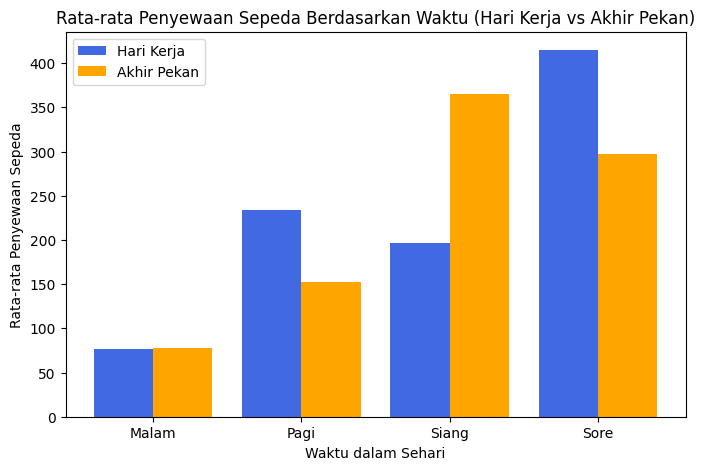

In [ ]:
# Memisahkan data hari kerja dan akhir pekan
working_day = hour_df[hour_df['workingday'] == 1]
weekend = hour_df[hour_df['workingday'] == 0]

# Menghitung rata-rata penyewaan berdasarkan kategori waktu dalam sehari
working_day_avg = working_day.groupby('time_of_day')['cnt'].mean().reset_index()
weekend_avg = weekend.groupby('time_of_day')['cnt'].mean().reset_index()

# Menggabungkan kedua dataframe untuk perbandingan
merged_avg_df = working_day_avg.merge(weekend_avg, on="time_of_day", suffixes=("_workday", "_weekend"))

# Visualisasi
plt.figure(figsize=(8, 5))
bar_width = 0.4
x = np.arange(len(merged_avg_df['time_of_day']))

plt.bar(x - bar_width/2, merged_avg_df['cnt_workday'], bar_width, label="Hari Kerja", color='royalblue')
plt.bar(x + bar_width/2, merged_avg_df['cnt_weekend'], bar_width, label="Akhir Pekan", color='orange')

plt.xticks(x, merged_avg_df['time_of_day'])
plt.xlabel("Waktu dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Waktu (Hari Kerja vs Akhir Pekan)")
plt.legend()
plt.show()

## Conclusion

Pertanyaan 1:
Tren penyewaan sepeda menunjukkan peningkatan signifikan dari tahun 2011 ke 2012, dengan pola musiman yang jelas. Penyewaan sepeda cenderung meningkat mulai awal tahun, mencapai puncak di pertengahan hingga akhir tahun, kemudian menurun menjelang akhir tahun. Peningkatan dari 2011 ke 2012 menunjukkan adanya pertumbuhan dalam penggunaan layanan penyewaan sepeda, kemungkinan karena meningkatnya popularitas, perubahan kebijakan transportasi, atau kondisi cuaca yang lebih mendukung.

Pertanyaan 2:
Penyewaan sepeda tertinggi terjadi pada hari Jumat, diikuti oleh Kamis dan Sabtu, sementara hari dengan penyewaan terendah adalah Minggu. Tren ini menunjukkan bahwa sepeda lebih sering digunakan pada hari kerja, kemungkinan sebagai moda transportasi untuk bekerja atau aktivitas harian lainnya. Penurunan pada hari Minggu menunjukkan bahwa penggunaan sepeda untuk rekreasi mungkin tidak sebesar penggunaannya untuk keperluan sehari-hari.

In [ ]:
day_df.to_csv("day.csv", index=False)

In [ ]:
hour_df.to_csv("hour.csv", index=False)

In [ ]:
from google.colab import files
files.download("day.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("hour.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>